In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(units=1024, activation='relu'))

model.add(Dense(units=38, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


C:\Users\kkaan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7

In [3]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989,446 (68.62 MB)

 Trainable params: 17,989,446 (68.62 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1600s 727ms/step - accuracy: 0.4633 - loss: 1.9666 - val_accuracy: 0.8516 - val_loss: 0.4571
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1458s 664ms/step - accuracy: 0.8788 - loss: 0.3689 - val_accuracy: 0.8874 - val_loss: 0.3572
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1661s 756ms/step - accuracy: 0.9213 - loss: 0.2365 - val_accuracy: 0.8678 - val_loss: 0.4341
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1526s 695ms/step - accuracy: 0.9344 - loss: 0.1931 - val_accuracy: 0.9121 - val_loss: 0.2820
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1755s 799ms/step - accuracy: 0.9480 - loss: 0.1595 - val_accuracy: 0.9153 - val_loss: 0.2886
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1478s 673ms/step - accuracy: 0.9526 - loss: 0.1415 - val_accuracy: 0.9169 - val_loss: 0.3011
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1453s 661ms/step - accuracy: 0.9573 - loss: 0.1320 - val_accuracy: 0.8767 - val_loss: 0.5389
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1431s 652ms/s

In [5]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 375s 170ms/step - accuracy: 0.9614 - loss: 0.1322


In [6]:
 print(train_loss, train_acc)
    

0.12145471572875977 0.9637527465820312


In [7]:
val_loss,val_acc = model.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 92s 168ms/step - accuracy: 0.9038 - loss: 0.4402


In [8]:
print(val_loss,val_acc)


0.42888331413269043 0.9046210050582886


In [10]:
model.save("trained_model.keras")

In [19]:
training_history.history['val_accuracy']

[0.8516389727592468,
 0.8873776197433472,
 0.8678010702133179,
 0.9121329188346863,
 0.9152629375457764,
 0.9168563485145569,
 0.8767356872558594,
 0.9095720648765564,
 0.9095151424407959,
 0.9046210050582886]

In [16]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

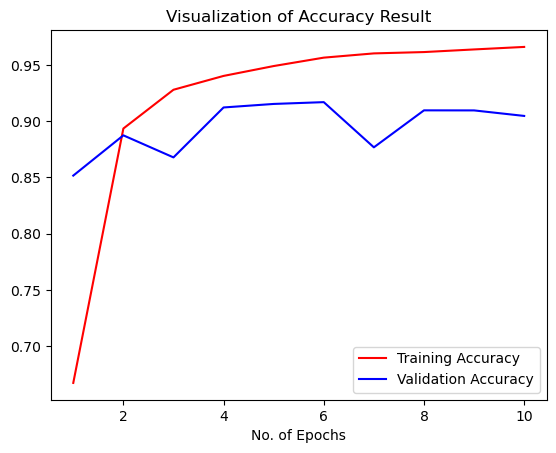

In [21]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [23]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [26]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 89s 162ms/step


(array([[9.99906659e-01, 7.54160681e-08, 1.04715056e-10, ...,
         7.77921361e-14, 8.63059658e-15, 2.12972591e-11],
        [9.99990821e-01, 7.63117109e-13, 9.18246395e-14, ...,
         3.38422776e-16, 5.66985559e-14, 1.85622241e-16],
        [9.99999642e-01, 4.57532970e-12, 8.43576160e-08, ...,
         1.23690319e-17, 6.00552941e-11, 2.29180870e-08],
        ...,
        [4.67938410e-10, 6.20523499e-17, 8.84866935e-09, ...,
         4.21540969e-10, 1.52113633e-14, 9.97718215e-01],
        [5.78337017e-21, 1.63453653e-31, 3.69952261e-17, ...,
         2.58516405e-19, 1.16274159e-21, 1.00000000e+00],
        [1.27850102e-20, 3.74021669e-21, 2.19904286e-23, ...,
         1.36957976e-23, 3.68124059e-17, 9.99989867e-01]], dtype=float32),
 (17572, 38))

In [27]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [28]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.87      0.87       504
                                 Apple___Black_rot       0.96      0.93      0.94       497
                          Apple___Cedar_apple_rust       0.90      0.91      0.90       440
                                   Apple___healthy       0.86      0.92      0.89       502
                               Blueberry___healthy       0.97      0.92      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.99      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.91      0.89       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.94      0.

<Axes: >

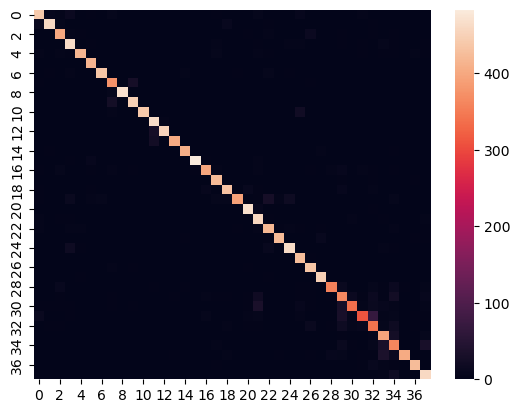

In [42]:
sns.heatmap(cm)

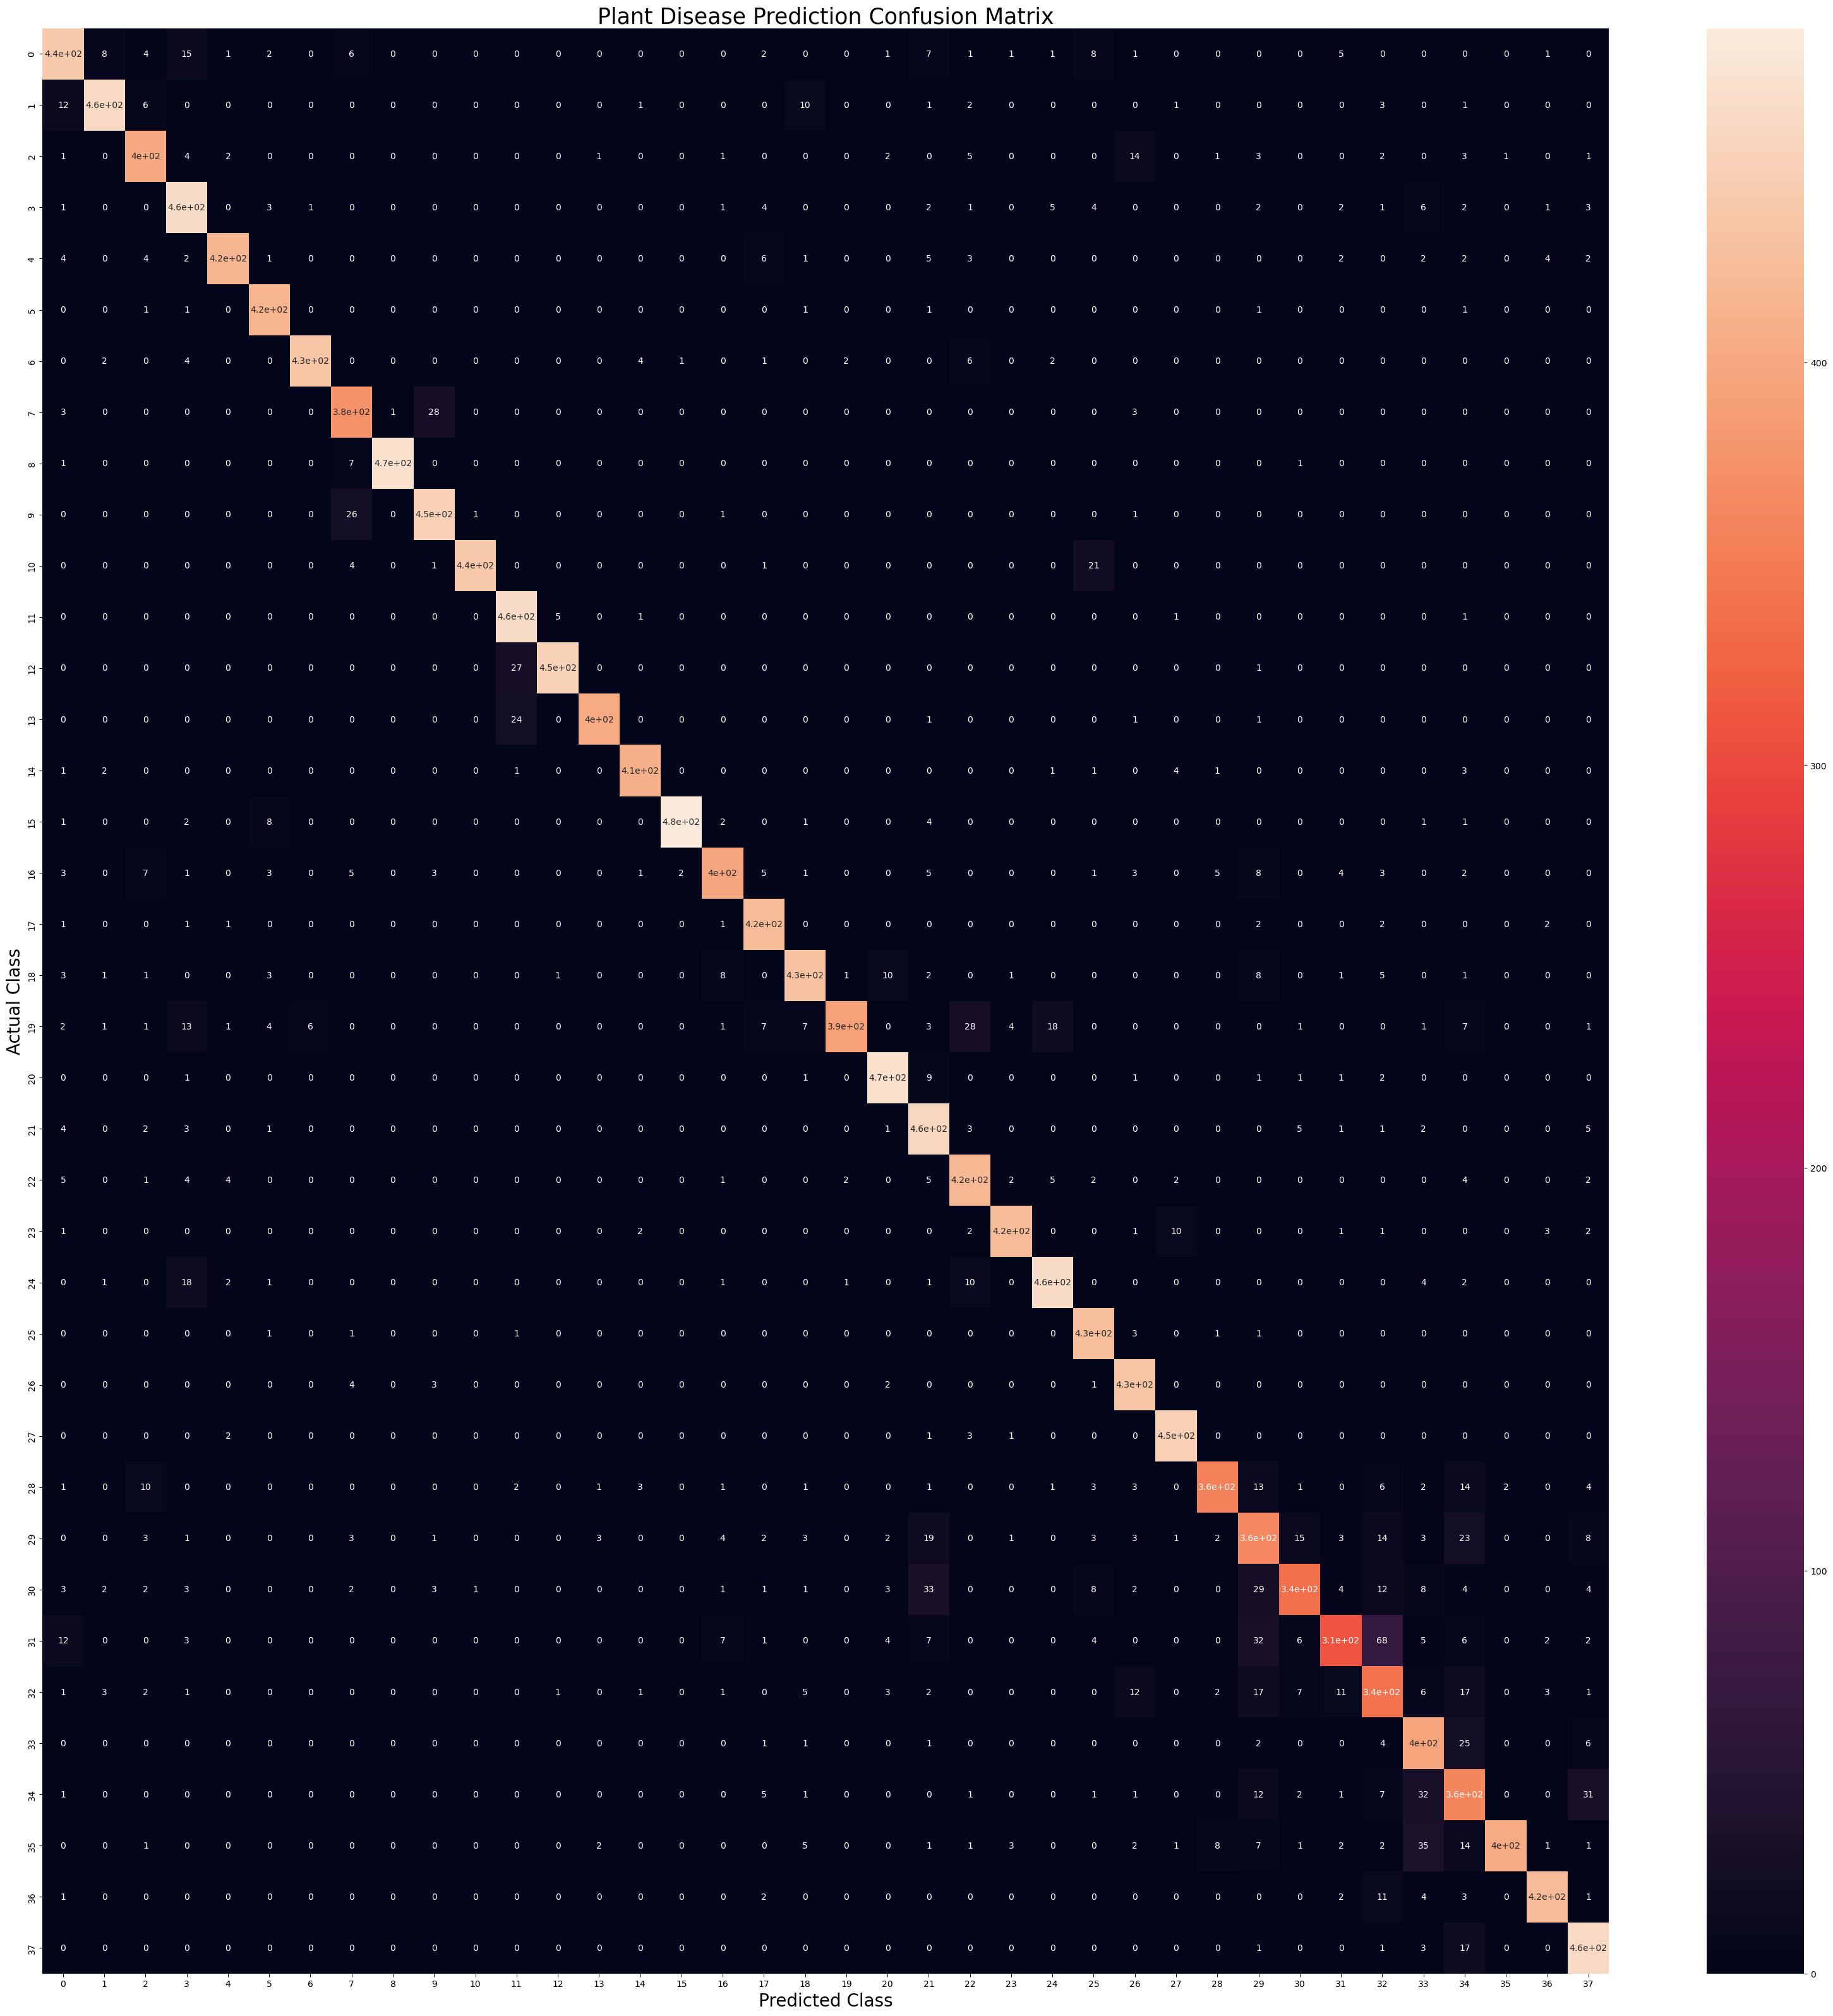

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()